Two-Way ANOVA result:
                            sum_sq    df           F        PR(>F)
C(Sex)               10758.400000   1.0  169.098149  8.039000e-22
C(Treatment)          5005.866667   2.0   39.340552  8.781554e-13
C(Sex):C(Treatment)   6247.466667   2.0   49.098149  7.534753e-15
Residual              5344.266667  84.0         NaN           NaN

Tukey's Test Result:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj   lower    upper   reject
----------------------------------------------------------
FControl  FDrug_1    -34.8    0.0 -43.2946 -26.3054   True
FControl  FDrug_2    -32.0    0.0 -40.4946 -23.5054   True
FControl MControl     -1.6 0.9939 -10.0946   6.8946  False
FControl  MDrug_1   0.6667 0.9999  -7.8279   9.1613  False
FControl  MDrug_2  -0.2667    1.0  -8.7613   8.2279  False
 FDrug_1  FDrug_2      2.8 0.9287  -5.6946  11.2946  False
 FDrug_1 MControl     33.2    0.0  24.7054  41.6946   True
 FDrug_1  MDrug_1  35.4667    0.0 

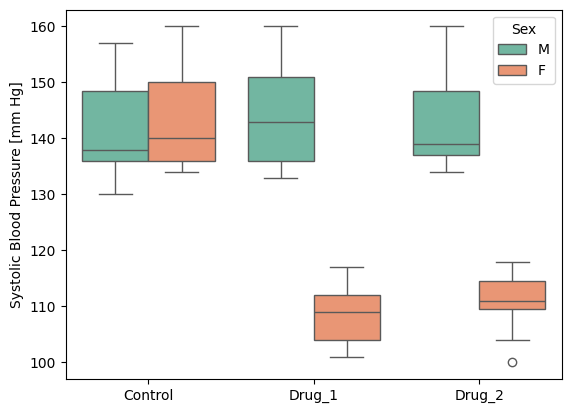

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_data.csv' with the path to your CSV file
fileName = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/systolic_blood_pressure.csv"
data = pd.read_csv(fileName)

# Two-way ANOVA
model = ols('Systolic ~ C(Sex) + C(Treatment) + C(Sex):C(Treatment)', data=data).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print("Two-Way ANOVA result:\n", anova_result)

# Tukey's HSD test for pairwise comparisons
tukey = pairwise_tukeyhsd(endog=data['Systolic'], groups=data['Sex'] + data['Treatment'], alpha=0.05)
print("\nTukey's Test Result:\n", tukey)

# Save Tukey's test result to CSV
tukey_result_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tukey_result_df.to_csv("tukey_test_results.csv", index=False)

## Create a grouped boxplot
ax = sns.boxplot(x='Treatment', y='Systolic', hue='Sex', data=data, palette='Set2')
ax.set(xlabel='', ylabel='Systolic Blood Pressure [mm Hg]')
plt.show()